In [5]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(pipeline)
plot.prepare_for_plots()

<Figure size 864x720 with 0 Axes>

In [2]:
train_dataloader, test_dataloader = pipeline.get_data()

In [3]:
# NB: только пример, параметры нужно подобрать
dist = 'uniform' # можно попробовать гаусса в принципе
eps = 1e-1


# From scratch: full training with nosie data

In [7]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_student_model()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.full_student_learning_rate)
    
    for epoch in range(consts.full_student_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer, noise_dist=dist, noise_eps=eps)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    #torch.save(model.state_dict(), pipeline.get_path()+f'/scratch_full_{i}.pt')

Model 10
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Validation accuracy: 39.6%, Validation loss: 1.653402 

Epoch 2
-------------------------------


Validation accuracy: 41.4%, Validation loss: 1.577701 

Epoch 3
-------------------------------


Validation accuracy: 42.2%, Validation loss: 1.544365 

Epoch 4
-------------------------------


Validation accuracy: 42.4%, Validation loss: 1.524085 

Epoch 5
-------------------------------


Validation accuracy: 42.5%, Validation loss: 1.511974 

Epoch 6
-------------------------------


Validation accuracy: 42.7%, Validation loss: 1.500232 

Epoch 7
-------------------------------


Validation accuracy: 42.9%, Validation loss: 1.490756 

Epoch 8
-------------------------------


Validation accuracy: 42.9%, Validation loss: 1.483420 

Epoch 9
-------------------------------


Validation accuracy: 42.9%, Validation loss: 1.479672 

Epoch 10
-------------------------------


Validation accuracy: 43.1%, Validation loss: 1.473091 

Epoch 11
-------------------------------


Validation accuracy: 43.0%, Validation loss: 1.469396 

Epoch 12
-------------------------------


Validation accuracy: 43.1%, Validation loss: 1.464730 

Epoch 13
-------------------------------


Validation accuracy: 43.1%, Validation loss: 1.463376 

Epoch 14
-------------------------------


Validation accuracy: 43.3%, Validation loss: 1.456892 

Epoch 15
-------------------------------


Validation accuracy: 43.3%, Validation loss: 1.455481 

Epoch 16
-------------------------------


Validation accuracy: 43.5%, Validation loss: 1.452367 

Epoch 17
-------------------------------


Validation accuracy: 43.5%, Validation loss: 1.448903 

Epoch 18
-------------------------------


Validation accuracy: 43.5%, Validation loss: 1.447064 

Epoch 19
-------------------------------


Validation accuracy: 43.6%, Validation loss: 1.443766 

Epoch 20
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.441826 

Epoch 21
-------------------------------


Validation accuracy: 43.6%, Validation loss: 1.441028 

Epoch 22
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.438204 

Epoch 23
-------------------------------


Validation accuracy: 43.6%, Validation loss: 1.438733 

Epoch 24
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.436502 

Epoch 25
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.435059 

Epoch 26
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.431314 

Epoch 27
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.432825 

Epoch 28
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.429392 

Epoch 29
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.427085 

Epoch 30
-------------------------------


Validation accuracy: 43.6%, Validation loss: 1.428242 

Epoch 31
-------------------------------


Validation accuracy: 43.6%, Validation loss: 1.429672 

Epoch 32
-------------------------------


Validation accuracy: 43.6%, Validation loss: 1.427993 

Epoch 33
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.425229 

Epoch 34
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.425159 

Epoch 35
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.424406 

Epoch 36
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.424044 

Epoch 37
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.424218 

Epoch 38
-------------------------------


Validation accuracy: 43.9%, Validation loss: 1.419340 

Epoch 39
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.420937 

Epoch 40
-------------------------------


Validation accuracy: 43.9%, Validation loss: 1.419157 

Epoch 41
-------------------------------


Validation accuracy: 43.9%, Validation loss: 1.418576 

Epoch 42
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.418743 

Epoch 43
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.418943 

Epoch 44
-------------------------------


Validation accuracy: 43.9%, Validation loss: 1.416516 

Epoch 45
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.417842 

Epoch 46
-------------------------------


Validation accuracy: 43.9%, Validation loss: 1.415953 

Epoch 47
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.417076 

Epoch 48
-------------------------------


Validation accuracy: 43.7%, Validation loss: 1.418996 

Epoch 49
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.417516 

Epoch 50
-------------------------------


Validation accuracy: 43.8%, Validation loss: 1.415671 



FSGM Accuracy [0.4384, 0.4271, 0.4157, 0.4045, 0.3905, 0.375, 0.3585, 0.3405, 0.3232, 0.307]


Noise Accuracy [0.4384, 0.4399, 0.4378, 0.4244, 0.3865, 0.3555, 0.2966, 0.2988, 0.2424, 0.2079]


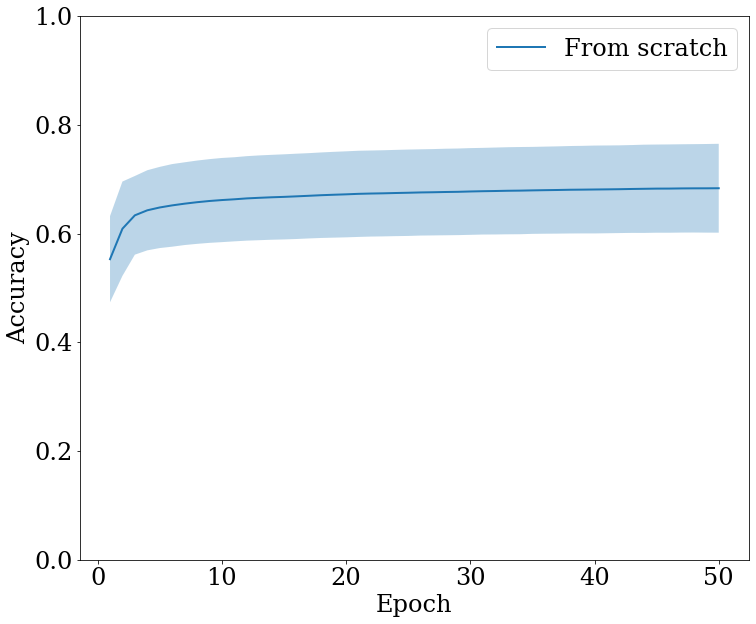

In [4]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.full_student_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

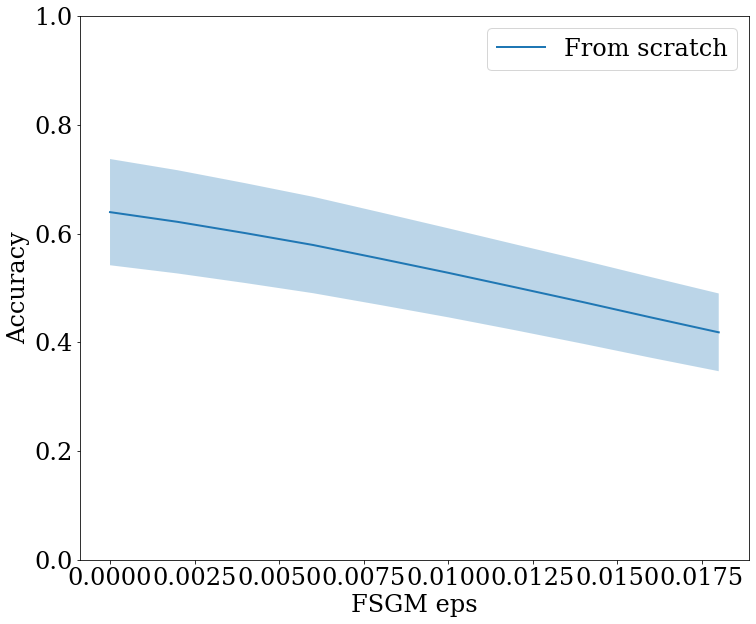

In [9]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

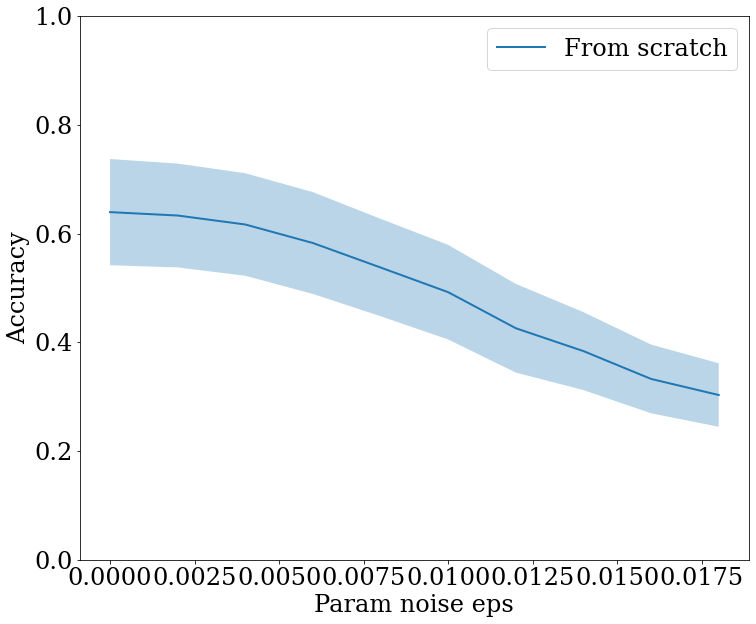

In [10]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')